In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
from matplotlib import style
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import seaborn as sns
from ipywidgets import interact
from statistics import mean

In [2]:
data1 = pdr.get_data_fred('FEDFUNDS')

In [3]:
data1.describe()

,FEDFUNDS
count,59.000000
mean,1.125424
std,0.853816
min,0.050000
25%,0.095000
50%,1.150000
75%,1.870000
max,2.420000


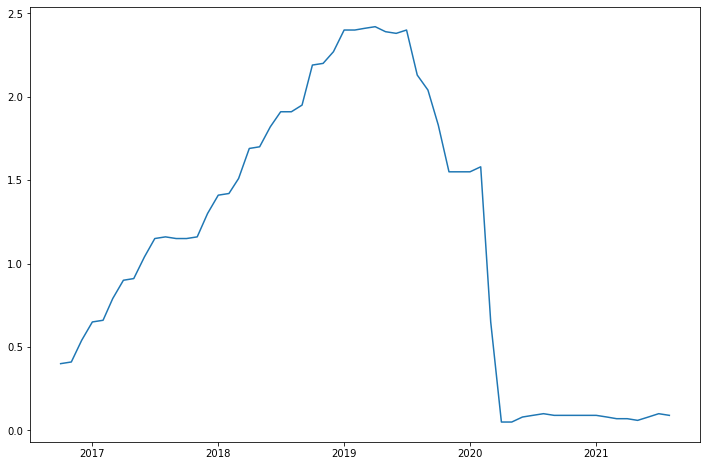

In [4]:
plt.plot(data1['FEDFUNDS'])
plt.show()

In [5]:
data2 = pdr.get_data_fred(['UNRATE', 'FEDFUNDS', 'INDPRO'])

In [6]:
data2.describe()

,UNRATE,FEDFUNDS,INDPRO
count,59.000000,59.000000,58.000000
mean,5.111864,1.125424,99.948360
std,2.314280,0.853816,3.872719
min,3.500000,0.050000,84.201800
25%,3.800000,0.095000,98.782400
50%,4.200000,1.150000,101.039900
75%,5.600000,1.870000,102.366575
max,14.800000,2.420000,104.165900


In [7]:
import statsmodels.formula.api as smf

In [8]:
regression_data2 = 'INDPRO~UNRATE+FEDFUNDS' 

In [9]:
regression_output_data2 = smf.ols(regression_data2, data2).fit()

In [10]:
print(regression_output_data2.summary())

                            OLS Regression Results                            
Dep. Variable:                 INDPRO   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     223.0
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           4.13e-27
Time:                        15:56:27   Log-Likelihood:                -96.257
No. Observations:                  58   AIC:                             198.5
Df Residuals:                      55   BIC:                             204.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    105.9635      0.778    136.225      0.0

[]

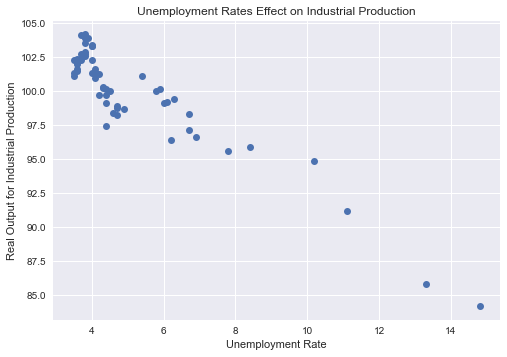

In [49]:
plt.plot(data2.UNRATE, data2.INDPRO, 'o')
plt.title('Unemployment Rates Effect on Industrial Production')
plt.xlabel('Unemployment Rate')
plt.ylabel('Real Output for Industrial Production')
plt.plot()

In [12]:
data3 = pdr.get_data_yahoo(['TSLA', 'F', 'VWAGY'], start = '2020-04-03')['Close']
data3.head()

Symbols,TSLA,F,VWAGY
Date,,,
2020-04-03,96.001999,4.24,12.39
2020-04-06,103.248001,4.53,13.52
2020-04-07,109.089996,4.71,13.79
2020-04-08,109.767998,5.03,14.00
2020-04-09,114.599998,5.37,14.56


In [13]:
data3.columns

Index(['TSLA', 'F', 'VWAGY'], dtype='object', name='Symbols')

In [15]:
data3.shape

(362, 3)

In [16]:
regression3 = 'TSLA~F+VWAGY'

In [17]:
regression_output_data3 = smf.ols(regression3, data3).fit()
print(regression_output_data3.summary())

                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     436.8
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           6.84e-97
Time:                        15:56:30   Log-Likelihood:                -2237.4
No. Observations:                 362   AIC:                             4481.
Df Residuals:                     359   BIC:                             4492.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8478     19.733      0.094      0.9

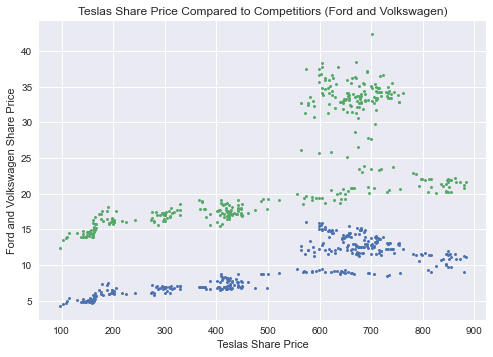

In [52]:
plt.plot(data3.TSLA, data3.F, 'o', markersize=3)
plt.plot(data3.TSLA, data3.VWAGY, 'o', markersize=3)
plt.title('Teslas Share Price Compared to Competitiors (Ford and Volkswagen)')
plt.xlabel('Teslas Share Price')
plt.ylabel('Ford and Volkswagen Share Price')
plt.show()

In [53]:
#comparing rate of return instead of share price
returns = np.log(data3).diff() #shows rate of return
returns.head()


Symbols,TSLA,F,VWAGY
Date,,,
2020-04-03,NaN,NaN,NaN
2020-04-06,0.072765,0.066159,0.087280
2020-04-07,0.055039,0.038966,0.019774
2020-04-08,0.006196,0.065732,0.015114
2020-04-09,0.043079,0.065408,0.039221


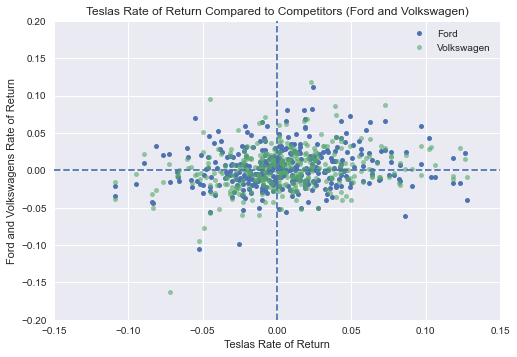

In [57]:
plt.plot(returns.TSLA, returns.F, 'o', markersize=5)
plt.plot(returns.TSLA, returns.VWAGY, 'o', markersize=5, alpha=.6)
plt.legend(['Ford', 'Volkswagen'])
plt.title('Teslas Rate of Return Compared to Competitors (Ford and Volkswagen)')
plt.xlabel('Teslas Rate of Return')
plt.ylabel('Ford and Volkswagens Rate of Return')
plt.axvline(0, ls='--')
plt.axhline(0, ls='--')
plt.xlim(-.15, .15)
plt.ylim(-.2, .2)
plt.show()

In [3]:
data4 = pd.read_csv('weight-height.csv')

In [4]:
data4.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
male_data4 = data4[data4.Gender == 'Male'][:200] #narrows list down to 200 rows

In [6]:
#convert to metric
male_data4['Height'] = male_data4['Height'].apply(lambda x: x*2.54)
male_data4['Weight'] = male_data4['Weight'].apply(lambda x: x*.45352937)

In [7]:
male_data4.head()

,Gender,Height,Weight
0,Male,187.571423,109.705835
1,Male,174.706036,73.612566
2,Male,188.239668,96.484226
3,Male,182.196685,99.795723
4,Male,177.499761,93.585695


In [8]:
#converting to lists
height_list = male_data4['Height'].tolist()
weight_list = male_data4['Weight'].tolist()

In [9]:
xs = np.array(height_list, dtype=np.float64)
ys = np.array(weight_list, dtype=np.float64)

In [10]:
def best_fit_line(xs,ys):
    slope = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
    y_intercept = mean(ys) - slope * mean(xs)
    return slope, y_intercept

In [11]:
slope, y_intercept = best_fit_line(xs,ys)

In [12]:
regression_line = [(slope * x) + y_intercept for x in xs]

In [13]:
#perdictions 
average_male_height = 175.26
average_male_weight = (slope * average_male_height) + y_intercept

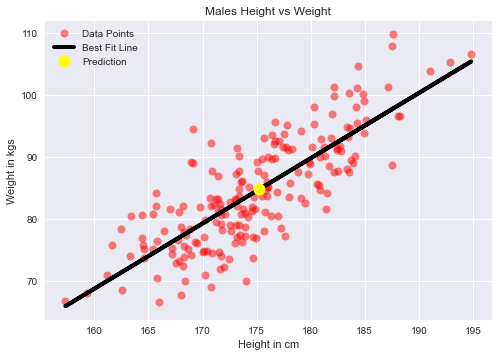

In [14]:
style.use('seaborn')
plt.plot(xs, ys, 'o', color='red', alpha=.5, markersize=8)
plt.plot(xs,regression_line, color='black', linewidth=4)
plt.plot(average_male_height, average_male_weight, 'o', color='yellow', markersize=12)
plt.title('Males Height vs Weight')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kgs')
plt.legend(['Data Points', 'Best Fit Line', 'Prediction'])
plt.show()

In [33]:
data1 = pd.read_csv('movies.csv')

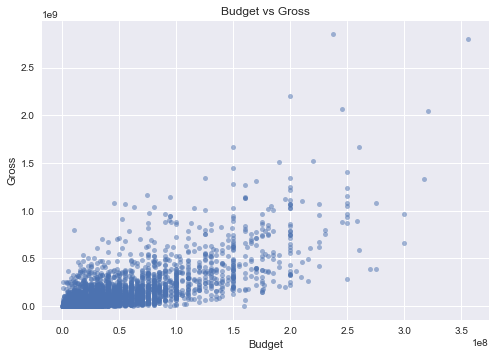

In [61]:
plt.plot(data1.budget, data1.gross, 'o', markersize=5, alpha=.5)
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

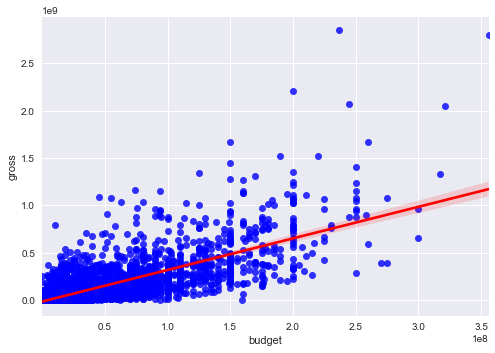

In [35]:
# Plot budget vs gross
sns.regplot(x='budget', y='gross', data=data1, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

In [36]:
data1.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


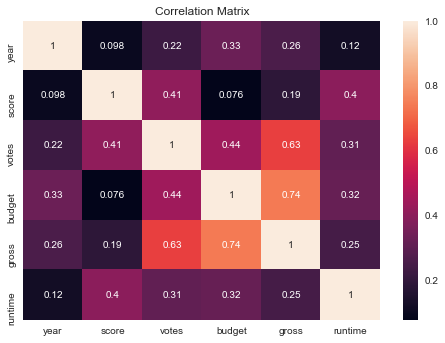

In [37]:
correlation_matrix = data1.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [44]:
# numerizing the data 
data1_numerized = data1
for col_name in data1_numerized.columns:
    if(data1_numerized[col_name].dtype == 'object'):
        data1_numerized[col_name]= data1_numerized[col_name].astype('category')
        data1_numerized[col_name]= data1_numerized[col_name].cat.codes
data1_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


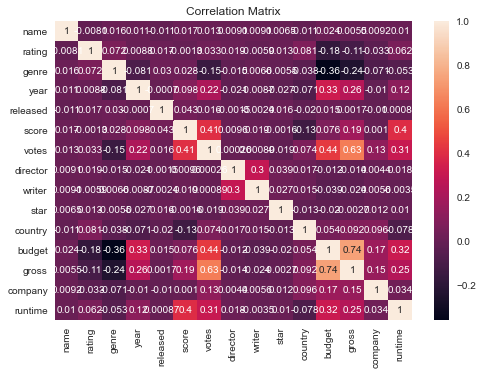

In [39]:
correlation_matrix = data1_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [40]:
correlation_mat = data1_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [41]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
gross    genre     -0.235650
rating   budget    -0.176002
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [42]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64